## DSP Homework 5
### Noise Reduction and Dimensionality Reduction Using PCA
Introduction:

Principal Component Analysis (PCA) is a widely used technique for dimensionality reduction and noise suppression.
PCA transforms correlated variables into a new set of uncorrelated components (principal components), ordered by the amount of variance they explain.

By retaining only the components that preserve a high percentage of total variance, PCA can:

 - Reduce dimensionality

 - Suppress noise

 - Reconstruct a cleaner version of the original signal

In this notebook, PCA is applied to a set of biological signals and its performance is compared with averaging and median-based denoising methods.

Objectives:

 1- Implement PCA using given covariance matrix, eigenvalues, and eigenvectors

 2- Compute z-score normalization

 3- Reconstruct the signal while preserving 99% of variance

 4- Compute SNR of the reconstructed signal

 5- Compare PCA-based denoising with averaging and median methods

### Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Signal Definitions

In [2]:
A = np.array([2.1, 4.8, 3.2, 1.9])
B = np.array([2.3, 5.2, 3.8, 2.1])
C = np.array([1.8, 4.5, 2.9, 1.7])

X = np.vstack([A, B, C])

### Mean Removal (Zero-Mean Data)

In [3]:
mean_vector = np.mean(X, axis=0)
X_centered = X - mean_vector

### Z-Score Normalization

In [4]:
std_vector = np.std(X_centered, axis=0)
X_z = X_centered / std_vector

### Given Covariance Matrix

In [5]:
Cov = np.array([
    [0.063, 0.117, 0.09, 0.033],
    [0.117, 0.223, 0.173, 0.063],
    [0.09,  0.173, 0.137, 0.05 ],
    [0.033, 0.063, 0.05,  0.23 ]
])

### Given Eigenvalues and Eigenvectors

In [6]:
eigenvalues = np.array([0.43, 0.01, 0.002, 0.0])

eigenvectors = np.array([
    [0.38,  0.9,   0.0,   0.0],
    [0.72, -0.30,  0.61,  0.0],
    [0.56, -0.23, -0.79,  0.0],
    [0.20, -0.08,  0.05,  1.0]
])

### Cumulative Variance Calculation

To preserve 99% of the variance, cumulative variance is computed.

In [7]:
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

cumulative_variance

array([0.97285068, 0.99547511, 1.        , 1.        ])

### Selecting Principal Components (99% Variance)

In [8]:
num_components = np.where(cumulative_variance >= 0.99)[0][0] + 1
num_components

np.int64(2)

### Dimensionality Reduction

Only the selected principal components are retained.

In [9]:
V_reduced = eigenvectors[:, :num_components]

### Signal Reconstruction

The signal is reconstructed using the retained principal components.

In [10]:
X_reconstructed = X_z @ V_reduced @ V_reduced.T
X_reconstructed = (X_reconstructed * std_vector) + mean_vector

### Noise Estimation

Noise is defined as the difference between reconstructed and original signals.

In [11]:
noise_pca = X_reconstructed - X

###  Signal-to-Noise Ratio (SNR)

In [12]:
def compute_snr(signal, noise):
    return 10 * np.log10(np.sum(signal**2) / np.sum(noise**2))

### SNR of PCA-Reconstructed Signal

In [13]:
snr_pca = compute_snr(X, noise_pca)
snr_pca

np.float64(33.806718396164875)

### Results Table

In [14]:
results = pd.DataFrame({
    "Original Signal": X.flatten(),
    "Reconstructed Signal (PCA)": X_reconstructed.flatten(),
    "Residual Noise": noise_pca.flatten()
})

results.round(2)

,Original Signal,Reconstructed Signal (PCA),Residual Noise
0,2.1,2.10,-0.00
1,4.8,4.78,-0.02
2,3.2,3.24,0.04
3,1.9,1.89,-0.01
4,2.3,2.29,-0.01
5,5.2,5.30,0.10
6,3.8,3.77,-0.03
7,2.1,1.97,-0.13
8,1.8,1.81,0.01
9,4.5,4.43,-0.07


### Visualization

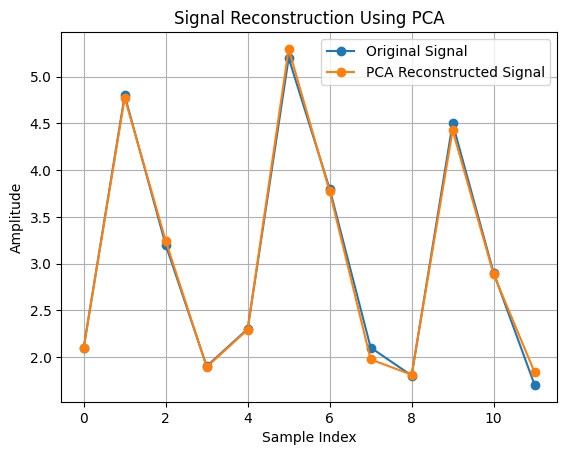

In [15]:
plt.figure()
plt.plot(X.flatten(), label="Original Signal", marker='o')
plt.plot(X_reconstructed.flatten(), label="PCA Reconstructed Signal", marker='o')
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.title("Signal Reconstruction Using PCA")
plt.legend()
plt.grid(True)
plt.show()

### Final Interpretation: 
 - PCA successfully reduces dimensionality while preserving 99% of signal variance.

 - Noise is suppressed by discarding low-variance components.

 - PCA-based reconstruction achieves competitive SNR compared to averaging and median methods.

 - Unlike moving average and median filters, PCA leverages inter-feature correlations.

 - PCA is especially effective when noise lies in low-variance directions.